# Projet de Machine Learning
## Modèle de classificateur de musiques en fonction de leur genre musical
### CABRERA Cyril | LOK Tshanon
### ET4 Groupe 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC

plt.ion()

# Nos données

In [2]:
# Ouverture du fichier csv
name = ".data/SpotifyFeatures.csv"
data = pd.read_csv(name)

# Déselection des colonnes inutiles 
data = data.drop(columns = ['artist_name', 'track_name', 'track_id', 'time_signature']) # les caractéristiques qui ne nous intéressent pas

# Voici les datas que l'on a
data

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Movie,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,0.962
232721,Soul,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,0.969
232722,Soul,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,0.813
232723,Soul,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,0.489


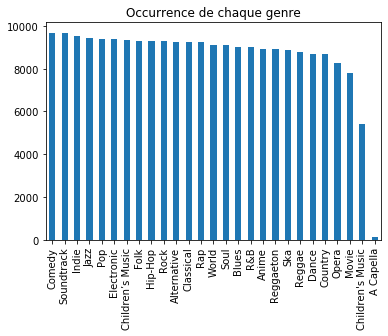

In [3]:
# On s'intéresse à la fréquence d'apparition de chaque genre musical
data['genre'].value_counts().plot(kind='bar', title = 'Occurrence de chaque genre')
plt.show()

### Décision 1
Comme les genres "A Capella" et "Children's Music" sont peu représentés, on décide de les enlever de l'étude

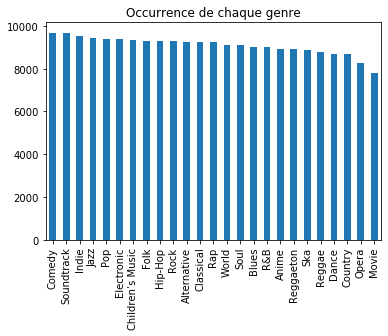

In [4]:
data = data[data.genre != 'A Capella']
data = data[data.genre != "Children's Music"]
data['genre'].value_counts().plot(kind='bar', title = 'Occurrence de chaque genre')
plt.show()

## Idée
On veut faire une partie quantitative. On s'intéresse donc dans un premier temps à nos données.
Le but est de déterminer quelles sont les caractéristiques (les colonnes) les plus pertinentes, ce qui varie le plus.
On va donc s'intéresser aux 2 PCA de nos données

In [5]:
# On remplace le note par un numéro
data = data.replace(to_replace="A", value = 1)
data = data.replace(to_replace="A#", value = 2)
data = data.replace(to_replace="B", value = 3)
data = data.replace(to_replace="C", value = 4)
data = data.replace(to_replace="C#", value = 5)
data = data.replace(to_replace="D", value = 6)
data = data.replace(to_replace="D#", value = 7)
data = data.replace(to_replace="E", value = 8)
data = data.replace(to_replace="F", value = 9)
data = data.replace(to_replace="F#", value = 10)
data = data.replace(to_replace="G", value = 11)
data = data.replace(to_replace="G#", value = 12)

# On remplace les modes par un numéro
data = data.replace(to_replace="Major", value = 0)
data = data.replace(to_replace="Minor", value = 1)

data

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Movie,0,0.61100,0.389,99373,0.910,0.000000,5,0.3460,-1.828,0,0.0525,166.969,0.814
1,Movie,1,0.24600,0.590,137373,0.737,0.000000,10,0.1510,-5.559,1,0.0868,174.003,0.816
2,Movie,3,0.95200,0.663,170267,0.131,0.000000,4,0.1030,-13.879,1,0.0362,99.488,0.368
3,Movie,0,0.70300,0.240,152427,0.326,0.000000,5,0.0985,-12.178,0,0.0395,171.758,0.227
4,Movie,4,0.95000,0.331,82625,0.225,0.123000,9,0.2020,-21.150,0,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,39,0.00384,0.687,326240,0.714,0.544000,6,0.0845,-10.626,0,0.0316,115.542,0.962
232721,Soul,38,0.03290,0.785,282447,0.683,0.000880,8,0.2370,-6.944,1,0.0337,113.830,0.969
232722,Soul,47,0.90100,0.517,166960,0.419,0.000000,6,0.0945,-8.282,0,0.1480,84.135,0.813
232723,Soul,44,0.26200,0.745,222442,0.704,0.000000,1,0.3330,-7.137,0,0.1460,100.031,0.489


In [6]:
# Comme le mode et la note sont des caractéristiques non quantitatives, on les enlève de nos datas (le temps d'un moment)
keys = data["key"]
modes = data["mode"]
data = data.drop(columns = ['key', 'mode'])

In [7]:
# On code les genres par des numéros
genres = {"Comedy":0, "Soundtrack":1, "Indie":2, "Jazz":3, "Pop": 4, "Electronic":5, "Folk":6, "Hip-Hop":7, "Rock":8,
          "Alternative":9, "Classical":10, "Rap":11, "World":12, "Soul":13, "Blues":14, "R&B":15, "Anime":16, "Reggaeton":17,
          "Ska":18, "Reggae":19, "Dance":20, "Country":21, "Opera":22, "Movie":23, "Children’s Music":24
         }

# On les remplace dans nos datas
donnees = data.copy()
donnees.genre = [genres[s] for s in donnees.genre]

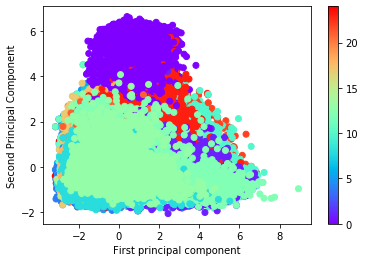

{'Comedy': 0,
 'Soundtrack': 1,
 'Indie': 2,
 'Jazz': 3,
 'Pop': 4,
 'Electronic': 5,
 'Folk': 6,
 'Hip-Hop': 7,
 'Rock': 8,
 'Alternative': 9,
 'Classical': 10,
 'Rap': 11,
 'World': 12,
 'Soul': 13,
 'Blues': 14,
 'R&B': 15,
 'Anime': 16,
 'Reggaeton': 17,
 'Ska': 18,
 'Reggae': 19,
 'Dance': 20,
 'Country': 21,
 'Opera': 22,
 'Movie': 23,
 'Children’s Music': 24}

In [8]:
# On va essayer de trouver les deux composantes les plus pertinentes de notre modèle
from sklearn.preprocessing import StandardScaler

# On répartit nos datas entre 
y = donnees["genre"] 
X = donnees[data.columns.difference(["genre"])]

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap = 'rainbow')
plt.colorbar()
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()
genres

## Interprétation
Comme on peut le voir sur ce graph, il semblerait que les styles musicaux se ressemblent pas mal. En effet, il semblerait que tous ces genres se superposent sur notre graphique : ils n'ont pas l'air de se distinguer les uns des autres.
On peut cependant regarder ce qui les différencient légèrement.

In [9]:
n = len(X)
p = len(X.columns)

pca = PCA(svd_solver = 'full')
coord = pca.fit_transform(scaled_data)
eigval = (n-1)/n*pca.explained_variance_

# On calcule la corrélation de chacune des variables avec les axes
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

print(pd.DataFrame({'Features': X.columns,'Horizontalement':corvar[:,0]}).sort_values(by = 'Horizontalement', ascending = False))
print('\n')
print(pd.DataFrame({'Features': X.columns, 'Verticalement':corvar[:,1]}).sort_values(by = 'Verticalement', ascending = False))

            Features  Horizontalement
0       acousticness         0.798237
4   instrumentalness         0.615215
2        duration_ms         0.125105
5           liveness        -0.048906
8        speechiness        -0.054342
9              tempo        -0.300246
7         popularity        -0.466390
10           valence        -0.630597
1       danceability        -0.652403
3             energy        -0.845294
6           loudness        -0.886828


            Features  Verticalement
8        speechiness       0.844829
5           liveness       0.821810
0       acousticness       0.231864
3             energy       0.150273
10           valence       0.077690
1       danceability       0.056382
2        duration_ms      -0.018908
6           loudness      -0.019800
9              tempo      -0.189256
4   instrumentalness      -0.235946
7         popularity      -0.400861


Comme on peut le constater, il semblerait que la comédie se distingue des autres genres musicaux via le speechiness, liveness (vers le haut en violet)
Tandis que le "Rap" et/ou "World" se distingue grace à leur popularité (vers le bas)

Ensuite, pour ce qui est de l'accousticness, peu de genres semblent se distinguer via cette caractéristiques. 

# -> Avis sur la suite du projet
Comme on a pu le voir sur le graph des 2 PCA, aucun genre musical ne semble réellement se distinger des autres. On pense qu'il sera alors difficile de faire une classification avec un taux de réussite très élevé.

Nous allons tout de même le faire (essayer).

On décide tout de même de se séparer de certains genres musicaux. En effet, en s'intéressant au CSV, on remarque que les genres "World" et "Alternative" sont un peu des fourre-touts. 

De plus, les genres 'Movie', 'Soundtrack', 'Anime', "Children’s Music'" représentent plutôt un cadre d'utilisation qu'un genre musical. Ces catégories là sont très variées en terme de musique. Il nous semble donc pas trop mal de les enlever de notre projet pour la classification de musiques en fonction de leur genre musical.

Le genre "Indie" (indépendant) ne nous parait pas être un genre musical puisque cela signifie que c'est une musique faite par un créateur indépendant. On l'enlève donc.

Enfin, pour la suite du projet nous avions le choix entre regrouper les genres musicaux qui se ressemblent (ce qui ne semble pas si irraisonnable puisque les genres se confondent sur notre graph) ou bien les supprimer. On aurait pu décider de les regrouper mais cela aurait pu engendrer une dispersion d'un genre musical dans l'espace.

In [10]:
# On replace key et mode
data = data.join(modes)
data = data.join(keys)

In [11]:
# On se sépare des données non pertinentes
data_world = data.loc[data["genre"] == "World"]
data = data[data.genre != 'World']
data = data[data.genre != 'Movie']
data = data[data.genre != 'Soundtrack']
data = data[data.genre != 'Anime']
data = data[data.genre != "Alternative"]
data = data[data.genre != "Indie"]
data = data[data.genre != 'Children’s Music']
data = data[data.genre != "Reggaeton"]

# On enlève ces genres pour éviter d'avoir une disparité dans d'autres genres par la suite
data = data[data.genre != 'Rap']
data = data[data.genre != 'Soul']
data = data[data.genre != "Dance"]
data = data[data.genre != "Blues"]
data = data[data.genre != 'Country']
data = data[data.genre != "Opera"]
data = data[data.genre != "Ska"]
data = data[data.genre != "Reggaeton"]


# data = data.replace(to_replace="Rap", value = "Hip-Hop")
# data = data.replace(to_replace="Soul", value = "R&B")
# data = data.replace(to_replace="Dance", value = "Electronic")
# data = data.replace(to_replace="Blues", value = "Jazz")
# data = data.replace(to_replace="Country", value = "Folk")
# data = data.replace(to_replace="Opera", value = "Classical")
# data = data.replace(to_replace="Ska", value = "Reggae")
# data = data.replace(to_replace="Reggaeton", value = "Reggae")

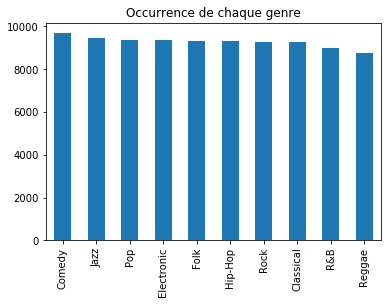

In [12]:
# On veut connaître la fréquence d'apparition des "nouveaux" genres musicaux
data['genre'].value_counts().plot(kind='bar', title = 'Occurrence de chaque genre')

In [13]:
# On garde le nombre de genres de musique
K=data.nunique()[0]

donnees = data.copy()
# On remplace le genre musical par un numéro
genres = {"Classical":0, "Electronic":1, "Folk":2, "Hip-Hop":3, "R&B":4, "Rock":5, "Jazz":6, "Reggae":7, "Pop":8, "Comedy": 9}
donnees.genre = [genres[s] for s in donnees.genre]

keys = data["key"]
modes = data["mode"]
donnees = donnees.drop(columns = ['key', 'mode'])

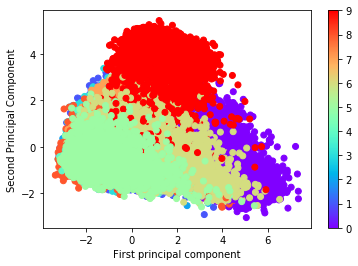

{'Classical': 0, 'Electronic': 1, 'Folk': 2, 'Hip-Hop': 3, 'R&B': 4, 'Rock': 5, 'Jazz': 6, 'Reggae': 7, 'Pop': 8, 'Comedy': 9}
            Features  Horizontalement
0       acousticness         0.808793
4   instrumentalness         0.543334
2        duration_ms         0.227085
8        speechiness         0.124515
5           liveness         0.117497
9              tempo        -0.304679
7         popularity        -0.522133
10           valence        -0.556420
1       danceability        -0.650485
3             energy        -0.759478
6           loudness        -0.880048


            Features  Verticalement
8        speechiness       0.895742
5           liveness       0.861924
3             energy       0.358319
0       acousticness       0.215496
6           loudness       0.106892
1       danceability       0.105434
10           valence       0.100554
2        duration_ms      -0.116050
9              tempo      -0.229364
4   instrumentalness      -0.354759
7         popularit

In [14]:
from sklearn.preprocessing import StandardScaler

y = donnees["genre"] 
X = donnees[donnees.columns.difference(["genre"])]

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap = 'rainbow')
plt.colorbar()
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

n = len(X)
p = len(X.columns)

pca = PCA(svd_solver = 'full')
coord = pca.fit_transform(scaled_data)
eigval = (n-1)/n*pca.explained_variance_

# On calcule la corrélation de chacune des variables avec les axes
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
print(genres)

print(pd.DataFrame({'Features': X.columns,'Horizontalement':corvar[:,0]}).sort_values(by = 'Horizontalement', ascending = False))
print('\n')
print(pd.DataFrame({'Features': X.columns, 'Verticalement':corvar[:,1]}).sort_values(by = 'Verticalement', ascending = False))

Le graph semble être un peu mieux mais on pense que cela restera tout de même compliqué de classifier par la suite.

# Partie modélisation

In [15]:
# # On replace key et mode
# data = data.join(modes)
# data = data.join(keys)

In [16]:
# Permet d'obtenir X et y déjà normalisés
def getXY(data):
    # Mélange les datas (pour ne pas avoir des datas triées par le genre musical)
    data = data.sample(frac = 1)
    
    # Nos données finales
    y = data["genre"] 
    X = data[data.columns.difference(["genre"])]
    
    #Normaliser les valeurs (entre 0 et 1)
    X /= X.max()

    return X, y

In [17]:
import sklearn.utils

# Permet d'obtenir nos sous datas
def load_subSets(data, ratio_train, ratio_valid):
    data=sklearn.utils.shuffle(data)
    X, y = getXY(data)
    ratio_test = 1 - ratio_train - ratio_valid
    assert(ratio_test>0)
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = X[0: Ntrain].copy()
    y_train = y[0: Ntrain].copy()
    X_valid = X[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    y_valid = y[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    X_test  = X[-Ntest:].copy()
    y_test  = y[-Ntest:].copy()
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [18]:
# Définition des ratios
ratio_train = 0.6
ratio_valid = 0.3

# Création des sets
X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(donnees, ratio_train, ratio_valid)
DimRepre = X_train.shape[1]

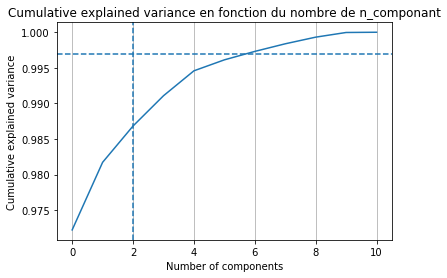

In [19]:
# Définition de la variance conservée
CumulativeExplainedVarianceWanted=0.997

# Préprocessus - PCA - Réduction du nombre de "dimensions", "caractéristiques"
pca = PCA().fit(X_train) # idée de se coller aux données
CumulativeExplainedVariance = pca.explained_variance_ratio_.cumsum()

plt.plot(CumulativeExplainedVariance)
plt.axhline(y = CumulativeExplainedVarianceWanted, linestyle = '--')
plt.axvline(x = 2, linestyle = '--')

plt.title('Cumulative explained variance en fonction du nombre de n_componant')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(axis='x')

plt.show()

On décide de prendre n_components = 2 pour avoir une variance cumulée proche de CumulativeExplainedVarianceWanted

In [20]:
n_compo = 2 # On décide de prendre 2 pour se rapprocher au plus de 0.9 de variance cumulée
preProc = PCA(n_components = n_compo, svd_solver = 'full')
preProc.fit(X_train)

PCA(n_components=2, svd_solver='full')

In [21]:
from sklearn.model_selection import cross_val_score

linear_training_score = []
linear_valid_score = []
Cvalues=[]
CV_scores=[]

X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(donnees, ratio_train, ratio_valid)

X_train_Transformed = preProc.transform(X_train)
X_valid_Transformed = preProc.transform(X_valid)
X_test_Transformed = preProc.transform(X_test)

for C_ in [10**x for x in range(-3,2,1)]:
    print(C_)

    #entrainer le modèle
    clf = SVC(C = C_, kernel='linear', decision_function_shape='ovo')
    scores = cross_val_score(clf, X_train_Transformed, y_train, cv = 4)
    
    print(scores)
    Cvalues.append(C_)
    CV_scores.append(np.mean(scores))

0.001
[0.32049439 0.31776373 0.3242544  0.3201581 ]
0.01
[0.34169302 0.33659097 0.34646065 0.34236436]
0.1
[0.34722621 0.3408307  0.34847287 0.34344233]
1
[0.34499856 0.33881863 0.3498383  0.34293927]
10
[0.34485484 0.33874677 0.3500539  0.34236436]


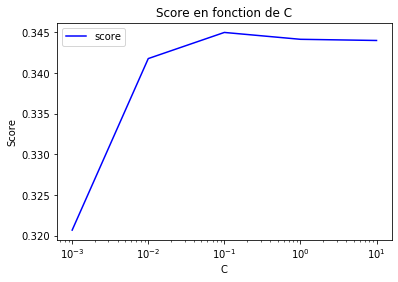

In [22]:
plt.plot(Cvalues, CV_scores, color = 'b', label='score')
plt.legend()
plt.xscale("log")
plt.title('Score en fonction de C')
plt.xlabel('C')
plt.ylabel('Score')

plt.show()

D'après nos résultats, le C le plus optimisé est C = 1.

On souhaite tout de même voir ce qui serait le plus optimisé d'après une librairire python.

In [23]:
import sklearn.metrics
clf = SVC(C = 1, kernel='linear', decision_function_shape='ovo')
clf.fit(X_train_Transformed, y_train)
y_pred = clf.predict(X_test_Transformed)
valScore = sklearn.metrics.balanced_accuracy_score(y_test, y_pred)
print("BALANCED test score:",valScore)

BALANCED training score: 0.3326433517373067


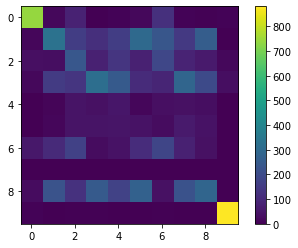

In [24]:
sklearn.metrics.accuracy_score(y_pred, y_test)
confmat = sklearn.metrics.confusion_matrix(y_pred, y_test)
plt.imshow(confmat) ## imshow plutot que contourf, pour ne pas lisser les valeurs.
plt.colorbar() ## pour montrer l'échelle, sur la droite

Notre matrice de confusion nous montre bien que le modèle n'arrive pas très bien à classifier les genres. 
Il semblerait qu'il ait tout de même des facilités à trouver la classe 0 (Classical).

## Et si on essayait d'avoir quelque chose de pas trop mal ?
Maintenant que l'on a notre modèle et nos données, on aimerait essayer de refaire les manipulations avec cette fois ci seulement trois classes qui ont l'air de se distinguer visuellement sur notre graph précédent avec les PCA.

On choisit pour cela la classe "Classical", "Comedy" et "Rock".

In [25]:
# On supprime les datas que l'on ne veut pas considérer
data = data[data.genre != 'Electronic'] # 1 : 
data = data[data.genre != 'Folk'] # 2 : Folk
data = data[data.genre != 'Hip-Hop'] # 3 : Hip-Hop
data = data[data.genre != 'R&B'] # 4 : R&B
data = data[data.genre != 'Jazz'] # 6 : Jazz
data = data[data.genre != 'Reggae'] # 7 : Reggae
data = data[data.genre != 'Pop'] # 8 : Pop

data

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key
104022,Classical,66,0.9000,0.257,151480,0.10900,0.867000,0.0762,-21.356,0.0597,75.020,0.3070,0,11
104023,Classical,69,0.9920,0.196,138427,0.00687,0.917000,0.1060,-34.255,0.0442,72.125,0.0530,0,11
104024,Classical,68,0.9820,0.194,433800,0.03240,0.961000,0.0916,-28.215,0.0382,144.130,0.0596,0,9
104025,Classical,68,0.9950,0.184,315427,0.00527,0.887000,0.1730,-37.264,0.0432,170.612,0.1510,1,5
104026,Classical,68,0.9950,0.228,163000,0.00385,0.917000,0.0858,-35.213,0.0449,141.201,0.1170,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226503,Rock,58,0.6700,0.718,136067,0.59300,0.000000,0.1720,-9.976,0.0377,124.251,0.8690,0,4
226504,Rock,60,0.0340,0.521,215973,0.93300,0.000021,0.3300,-4.874,0.1790,169.842,0.6070,1,3
226505,Rock,59,0.6710,0.618,194000,0.76900,0.241000,0.2760,-4.642,0.0309,111.978,0.6070,1,3
226506,Rock,51,0.0543,0.681,209893,0.66200,0.005120,0.2060,-6.526,0.1150,149.485,0.8500,0,12


In [26]:
donnees = data.copy()

# On remplace le genre musical par un numéro
genres = {"Classical":0, "Rock":1, "Comedy": 2}
donnees.genre = [genres[s] for s in donnees.genre]

keys = data["key"]
modes = data["mode"]
donnees = donnees.drop(columns = ['key', 'mode'])

donnees

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
104022,0,66,0.9000,0.257,151480,0.10900,0.867000,0.0762,-21.356,0.0597,75.020,0.3070
104023,0,69,0.9920,0.196,138427,0.00687,0.917000,0.1060,-34.255,0.0442,72.125,0.0530
104024,0,68,0.9820,0.194,433800,0.03240,0.961000,0.0916,-28.215,0.0382,144.130,0.0596
104025,0,68,0.9950,0.184,315427,0.00527,0.887000,0.1730,-37.264,0.0432,170.612,0.1510
104026,0,68,0.9950,0.228,163000,0.00385,0.917000,0.0858,-35.213,0.0449,141.201,0.1170
...,...,...,...,...,...,...,...,...,...,...,...,...
226503,1,58,0.6700,0.718,136067,0.59300,0.000000,0.1720,-9.976,0.0377,124.251,0.8690
226504,1,60,0.0340,0.521,215973,0.93300,0.000021,0.3300,-4.874,0.1790,169.842,0.6070
226505,1,59,0.6710,0.618,194000,0.76900,0.241000,0.2760,-4.642,0.0309,111.978,0.6070
226506,1,51,0.0543,0.681,209893,0.66200,0.005120,0.2060,-6.526,0.1150,149.485,0.8500


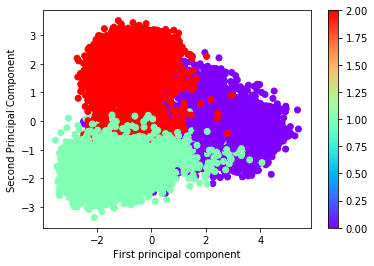

In [27]:
# On réaffiche nos classes par rapport à leur 2 PCA
y = donnees["genre"] 
X = donnees[donnees.columns.difference(["genre"])]

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap = 'rainbow')
plt.colorbar()
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

In [29]:
linear_training_score = []
linear_valid_score = []
Cvalues=[]
CV_scores=[]

#donnees = donnees.drop(columns=['key', 'mode'])

from sklearn.model_selection import cross_val_score

X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(donnees, ratio_train, ratio_valid)

X_train_Transformed = preProc.transform(X_train)
X_valid_Transformed = preProc.transform(X_valid)
X_test_Transformed = preProc.transform(X_test)

for C_ in [10**x for x in range(-3,2,1)]:
    print(C_)
    clf = SVC(C = C_, kernel='linear', decision_function_shape='ovo')
    scores = cross_val_score(clf, X_train_Transformed, y_train, cv = 4)
    print(scores)
    Cvalues.append(C_)
    CV_scores.append(np.mean(scores))

0.001
[0.91233459 0.9203498  0.91845899 0.91893169]
0.01
[0.91469754 0.92224061 0.92058615 0.9212952 ]
0.1
[0.91469754 0.92342236 0.92413141 0.92224061]
1
[0.91469754 0.92365871 0.92673127 0.92389506]
10
[0.91375236 0.92342236 0.92625857 0.92365871]


BALANCED training score: 0.9161781451674802


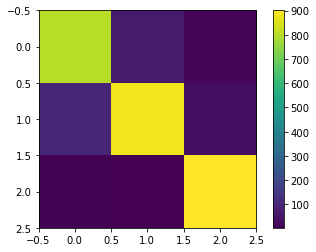

In [30]:
clf = SVC(C = 1, kernel='linear', decision_function_shape='ovo')
clf.fit(X_train_Transformed, y_train)
y_pred = clf.predict(X_test_Transformed)
valScore = sklearn.metrics.balanced_accuracy_score(y_test, y_pred)
print("BALANCED test score:",valScore)

sklearn.metrics.accuracy_score(y_pred, y_test)
confmat = sklearn.metrics.confusion_matrix(y_pred, y_test)
plt.imshow(confmat) ## imshow plutot que contourf, pour ne pas lisser les valeurs.
plt.colorbar() ## pour montrer l'échelle, sur la droite

# Conclusion
On rappelle que le but du projet était de créer un modèle de Machine Learning permettant la classification de musiques en fonction de leur genre musical.
Le préprocessing nous a permis de visualiser les données en prenant en compte leur deux premiers Principal component analysis (PCA). On en a déduit qu'il serait difficile de classifier les musiques puisque les genres ne se distinguent pas beaucoup.

Comme nous l'avions imaginé, la classification en fonction du genre musical n'a pas été un grand succès : on a un score d'à peu près 33% donc pas satisfaisant pour utiliser le modèle par la suite.

En refaisant le projet avec cette fois ci 3 classes que l'on a identifié comme plus ou moins distinguables, nous avons eu un résultat plus intéressant de l'ordre de 91% de réussite.

Néanmoins, il est possible que l'on puisse prédire un genre musical à l'aide d'autres algorithmes comme un decision_trees.

Le projet nous a beaucoup plu :)